<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Capacities" data-toc-modified-id="Capacities-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Capacities</a></span></li><li><span><a href="#length/time" data-toc-modified-id="length/time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>length/time</a></span></li></ul></li><li><span><a href="#Inverse-demand-shift" data-toc-modified-id="Inverse-demand-shift-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inverse demand shift</a></span></li><li><span><a href="#From-previous-code" data-toc-modified-id="From-previous-code-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>From previous code</a></span></li></ul></div>

# Description

This notebook enables appropriate vizualisation of cost and inverse demand functions to choose appropriate parameters:
- Inverse demand shifts
- potential shifts
- capacities, lengths/time

Note:
- We will limit the maximum potential demand to 10 currently
- This means that the intersection should happen "before" 10 in order to have a solution

# Load

In [18]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from routines_icu import *
from helpers_icu import *
import cvxpy as cp
from FW_icu import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualizations

In [6]:
N=10

In [7]:
x_12=np.linspace(0,N,100)

## Capacities

In [8]:
phi_ref=phi(10,10)
k_vec=np.linspace(1,20,20)

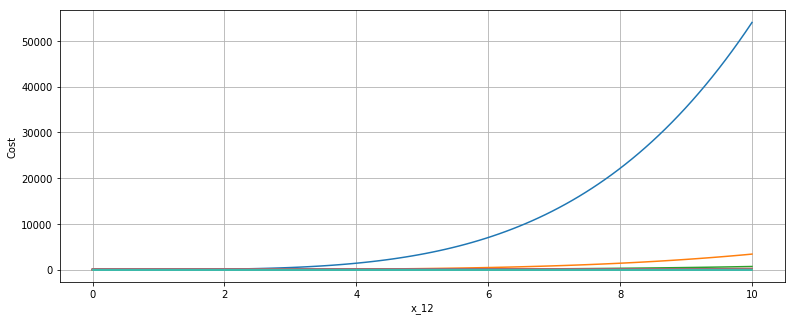

In [9]:
plt.figure(figsize=(13,5))
for k in k_vec:
    C=BPR(phi_ref,x_12,k)
    plt.plot(x_12,C)
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

In [11]:
INVERSE_DEMAND_SHIFT = 80

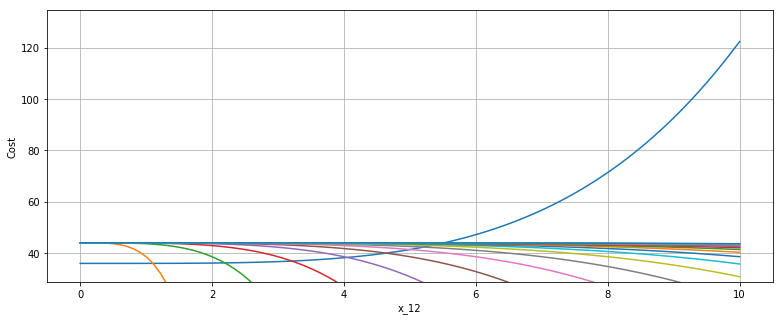

In [12]:
C1=BPR(phi(10,10),x_12,5)
C2=[]
for k in k_vec:
    C2_=-BPR(phi_ref,x_12,k)+INVERSE_DEMAND_SHIFT
    C2.append(C2_)

plt.figure(figsize=(13,5))
plt.plot(x_12,C1,label=("C1"))
for C2_ in C2:
    plt.plot(x_12,C2_,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
# plt.legend()
plt.grid(True)
plt.ylim([0.8*C1[0],1.1*C1[-1]]);

## length/time

In [13]:
k_ref=5
phi_vec=np.linspace(1,20,20)

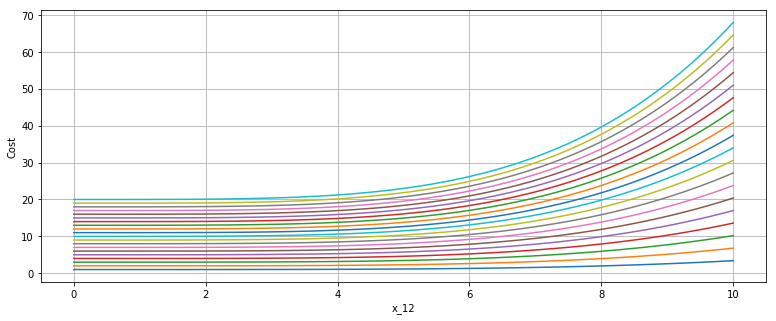

In [14]:
plt.figure(figsize=(13,5))
for phi_k in phi_vec:
    C=BPR(phi_k,x_12,k_ref)
    plt.plot(x_12,C)
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)



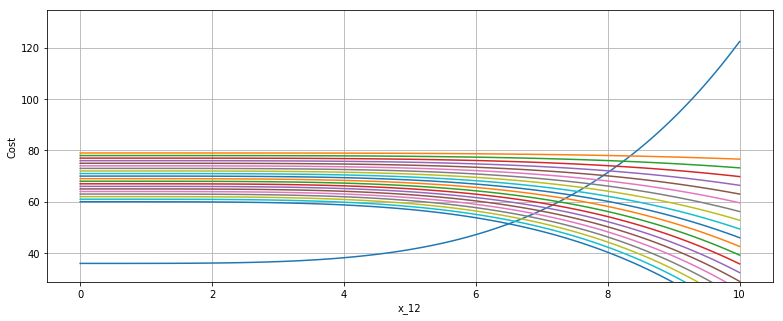

In [19]:

x_12=np.linspace(0,N,100)

C1=BPR(phi(10,10),x_12,5)
C2=[]
for phi_k in phi_vec:
    C2_=-BPR(phi_k,x_12,k_ref)+INVERSE_DEMAND_SHIFT
    C2.append(C2_)

plt.figure(figsize=(13,5))
plt.plot(x_12,C1,label=("C1"))
for C2_ in C2:
    plt.plot(x_12,C2_,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
# plt.legend()
plt.grid(True)
plt.ylim([0.8*C1[0],1.1*C1[-1]]);

# Inverse demand shift

In [23]:
k_ref

5

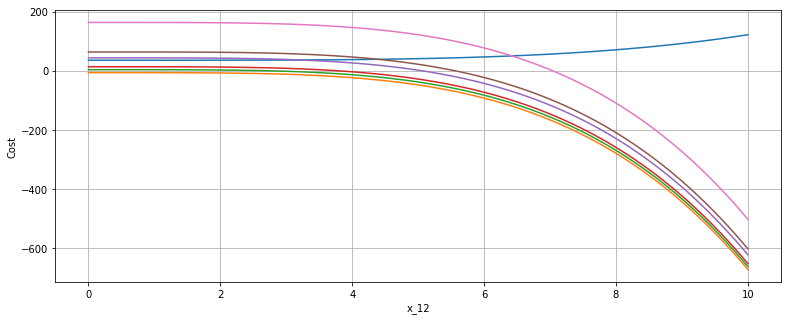

In [25]:
ids_vec=[30,40,50,80,100,200]
x_12=np.linspace(0,N,100)

C1=BPR(phi(10,10),x_12,5)
C2=[]
for ids in ids_vec:
    C2_=-BPR(phi_ref,x_12,3)+ids
    C2.append(C2_)

plt.figure(figsize=(13,5))
plt.plot(x_12,C1,label=("C1"))
for C2_ in C2:
    plt.plot(x_12,C2_,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
# plt.legend()
plt.grid(True)
# plt.ylim([0.8*C1[0],1.1*C1[-1]]);